# Import Basic Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Read test and train file

In [3]:
#import test and train file
everything = pd.read_json("../input/whats-cooking/train.json")
test = pd.read_json("../input/whats-cooking/test.json")

# Creating a list consisting of the top 100 ingredients and using them to predict the cuisine later on 

In [9]:
#making a dict of ingredients with their total used times in the data set
ingredientData = pd.DataFrame(everything[['ingredients']])
ingredientDict = {}
for i in range(0,39774):
    for ingredient in ingredientData.iloc[i][0]:
        if ingredient not in ingredientDict.keys():
            ingredientDict[ingredient] = 1
        else:
            ingredientDict[ingredient]+=1

In [10]:
#sorting the dictionary according to its value
sorted_dict={}
sorted_keys=sorted(ingredientDict, key=ingredientDict.get, reverse=True)
for r in sorted_keys:
    sorted_dict[r]= ingredientDict[r]

In [11]:
#removing the common ingredients
useless=[]
for key in sorted_dict.keys():
    useless.append(key)
    if len(useless)==12:
        break
for i in useless:
    del sorted_dict[i]

In [12]:
#getting the top 100 ingredients
top100=[]
for key in sorted_dict.keys():
    top100.append(key)
    if len(top100)==100:
        break

In [13]:
top100

['eggs',
 'soy sauce',
 'kosher salt',
 'green onions',
 'tomatoes',
 'large eggs',
 'carrots',
 'unsalted butter',
 'ground cumin',
 'extra-virgin olive oil',
 'black pepper',
 'milk',
 'chili powder',
 'oil',
 'red bell pepper',
 'purple onion',
 'scallions',
 'grated parmesan cheese',
 'sesame oil',
 'corn starch',
 'ginger',
 'baking powder',
 'jalapeno chilies',
 'dried oregano',
 'chopped cilantro fresh',
 'fresh lemon juice',
 'diced tomatoes',
 'fresh parsley',
 'minced garlic',
 'chicken broth',
 'sour cream',
 'cayenne pepper',
 'fresh ginger',
 'brown sugar',
 'cooking spray',
 'shallots',
 'garlic powder',
 'lime',
 'lemon juice',
 'fresh lime juice',
 'flour',
 'honey',
 'vanilla extract',
 'paprika',
 'chopped onion',
 'fish sauce',
 'ground cinnamon',
 'avocado',
 'canola oil',
 'dry white wine',
 'lemon',
 'rice vinegar',
 'yellow onion',
 'green bell pepper',
 'cilantro leaves',
 'tomato paste',
 'heavy cream',
 'cilantro',
 'fresh basil',
 'boneless skinless chicken b

# Creating DataFrame with top 100 ingredients as columns with cuisine and ID

Since the code takes very long to run with 39,000+ of rows, I've extracted it into a file. For first time users, you have to uncomment it and run the code

In [14]:
# extracted into csv
#creating a new dataset for Machine Learning
# mlDict = {}
# for top_ingredient in top100:
#     mlDict[top_ingredient]=[]
#     for i in range(0,39774):
#         if top_ingredient in everything.iloc[i]['ingredients']:
#             mlDict[top_ingredient].append(1)
#         else:
#             mlDict[top_ingredient].append(0)

In [15]:
# cuisine = []
# id_=[]
# for i in range(0,39774):
#         cuisine.append(everything.iloc[i]['cuisine'])
#         id_.append(everything.iloc[i]['id'])
# mlDict['id']=id_
# mlDict['cuisine']= cuisine


In [16]:
# mlDF=pd.DataFrame(mlDict)
# mlDF['cuisine'] = mlDF['cuisine'].astype('category')
# mlDF[top100] = mlDF[top100].astype('category')

In [17]:
# extract into CSV file
#machine_learning_csv = mlDF.to_csv (r'C:\Users\limka\OneDrive\Documents\NTU\Y1S2\CZ1015\Mini Project\machine_learning_csv.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [18]:
mlDF = pd.read_csv('../input/cooking/kaggle cooking/machine_learning_csv.csv')
mlDF

,eggs,soy sauce,kosher salt,green onions,tomatoes,large eggs,carrots,unsalted butter,ground cumin,extra-virgin olive oil,black pepper,milk,chili powder,oil,red bell pepper,purple onion,scallions,grated parmesan cheese,sesame oil,corn starch,ginger,baking powder,jalapeno chilies,dried oregano,chopped cilantro fresh,fresh lemon juice,diced tomatoes,fresh parsley,minced garlic,chicken broth,sour cream,cayenne pepper,fresh ginger,brown sugar,cooking spray,shallots,garlic powder,lime,lemon juice,fresh lime juice,...,lime juice,chicken stock,bay leaves,potatoes,chicken,corn tortillas,salsa,cumin,freshly ground pepper,ground turmeric,baking soda,sea salt,cumin seed,garam masala,shrimp,black beans,zucchini,ground beef,large garlic cloves,dried thyme,flour tortillas,tomato sauce,buttermilk,plum tomatoes,coconut milk,granulated sugar,fresh cilantro,bay leaf,celery,crushed red pepper,chopped cilantro,chicken breasts,mayonaise,shredded cheddar cheese,green chilies,ground coriander,cucumber,whole milk,id,cuisine
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10259,greek
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25693,southern_us
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,20130,filipino
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22213,indian
4,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13162,indian
5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6602,jamaican
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,42779,spanish
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3735,italian
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16903,mexican
9,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12734,italian


# Multiclass Classification Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.23419821994267612



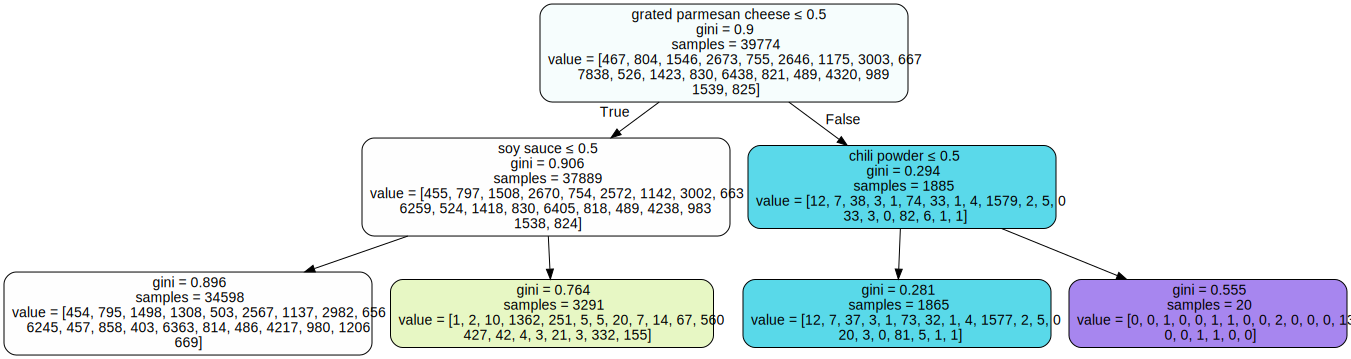

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Recall the Legendary-Total Dataset
y_train = pd.DataFrame(mlDF['cuisine'])   # Response
X_train = pd.DataFrame(mlDF[top100])       # Predictor

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)


# Increasing Max Depth and predicting train set

In [20]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 100)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7865942575551869



In [21]:
cuisine_pred = mlDF[mlDF["id"].isin(["11462", "40989", "27976", '22213','6487','25557','27976','1299'])]
cuisine_pred

,eggs,soy sauce,kosher salt,green onions,tomatoes,large eggs,carrots,unsalted butter,ground cumin,extra-virgin olive oil,black pepper,milk,chili powder,oil,red bell pepper,purple onion,scallions,grated parmesan cheese,sesame oil,corn starch,ginger,baking powder,jalapeno chilies,dried oregano,chopped cilantro fresh,fresh lemon juice,diced tomatoes,fresh parsley,minced garlic,chicken broth,sour cream,cayenne pepper,fresh ginger,brown sugar,cooking spray,shallots,garlic powder,lime,lemon juice,fresh lime juice,...,lime juice,chicken stock,bay leaves,potatoes,chicken,corn tortillas,salsa,cumin,freshly ground pepper,ground turmeric,baking soda,sea salt,cumin seed,garam masala,shrimp,black beans,zucchini,ground beef,large garlic cloves,dried thyme,flour tortillas,tomato sauce,buttermilk,plum tomatoes,coconut milk,granulated sugar,fresh cilantro,bay leaf,celery,crushed red pepper,chopped cilantro,chicken breasts,mayonaise,shredded cheddar cheese,green chilies,ground coriander,cucumber,whole milk,id,cuisine
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22213,indian
22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40989,southern_us
26,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27976,cajun_creole
29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1299,mexican
39761,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6487,chinese
39766,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25557,irish
39770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11462,italian


In [22]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(cuisine_pred[top100])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)

# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"], index = cuisine_pred.index)
predictedDF = pd.concat([cuisine_pred[['id','cuisine']], y_pred], axis = 1)

#predicting the cusine frome some of the recipe
predictedDF

,id,cuisine,PredType
3,22213,indian,italian
22,40989,southern_us,italian
26,27976,cajun_creole,cajun_creole
29,1299,mexican,mexican
39761,6487,chinese,chinese
39766,25557,irish,irish
39770,11462,italian,italian


# Random Forest and predicting train set

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest using Train Data
clf = RandomForestClassifier(n_jobs=2,n_estimators=100, random_state=0)  # create the  object
clf.fit(X_train, y_train)                    # train the model

y_train_pred = clf.predict(X_train)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(X_train, y_train))
print()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7865942575551869



In [24]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(cuisine_pred[top100])

# Predict Response corresponding to Predictors
y_pred = clf.predict(X_pred)

# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"], index = cuisine_pred.index)
predictedDF = pd.concat([cuisine_pred[['id','cuisine']], y_pred], axis = 1)

#predicting the cusine frome some of the recipe
predictedDF

,id,cuisine,PredType
3,22213,indian,italian
22,40989,southern_us,italian
26,27976,cajun_creole,cajun_creole
29,1299,mexican,mexican
39761,6487,chinese,chinese
39766,25557,irish,irish
39770,11462,italian,italian


# Using For Test set

In [25]:
#creating a test dataset for Machine Learning
testdict = {}
for top_ingredient in top100:
    testdict[top_ingredient]=[]
    for i in range(0,9944):
        if top_ingredient in test.iloc[i]['ingredients']:
            testdict[top_ingredient].append(1)
        else:
            testdict[top_ingredient].append(0)

In [26]:
id_=[]
for i in range(0,9944):
        id_.append(test.iloc[i]['id'])
testdict['id']=id_

In [27]:
testDF=pd.DataFrame(testdict)
testDF[top100] = testDF[top100].astype('category')

## Prediction from classification tree

In [28]:
#classification Tree #predicting the cusine frome some of the recipe
cuisine_pred = testDF[testDF["id"].isin([ 36914,2280,14729,4594,2237,45631,45523,4977,7124,])]
X_pred = pd.DataFrame(cuisine_pred[top100])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)

# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"], index = cuisine_pred.index)
predictedDF = pd.concat([cuisine_pred[['id']], y_pred], axis = 1)

predictedDF

,id,PredType
246,36914,french
247,2280,southern_us
248,14729,italian
249,4594,italian
250,2237,mexican
251,45631,indian
287,45523,british
289,7124,french


## Prediction from Random Forest

In [29]:
#random forest #predicting the cusine frome some of the recipe
cuisine_pred = testDF[testDF["id"].isin([ 36914,2280,14729,4594,2237,45631,45523,4977,7124,])]
X_pred = pd.DataFrame(cuisine_pred[top100])

# Predict Response corresponding to Predictors
y_pred = clf.predict(X_pred)

# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"], index = cuisine_pred.index)
predictedDF = pd.concat([cuisine_pred[['id']], y_pred], axis = 1)

predictedDF

,id,PredType
246,36914,french
247,2280,southern_us
248,14729,italian
249,4594,italian
250,2237,mexican
251,45631,indian
287,45523,british
289,7124,french
